<a href="https://colab.research.google.com/github/sirishti746/Deep-Learning/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis** **Project**

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"

In [3]:
import pandas as pd
df = pd.read_csv(url,sep="\t")

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Step 2 - Preprocessing/


In [5]:
import re
def preprocess_text(text:str) -> str:
  text = text.lower()
  text = re.sub("[^a-z 0-9]","",text)
  return text.strip()


In [6]:
preprocess_text("wow this is amazing!!!")

'wow this is amazing'

# Apply preprocessing on entire reviews

In [7]:
X = df["Review"].apply(preprocess_text).to_frame()

In [8]:
X

,Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


# Apply TFIDF Vectorisation

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X["Review"]).toarray()

In [10]:
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_pre.shape

(1000, 2067)

# Dimesionality reduction with svd

In [12]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300)
X_pre_red = svd.fit_transform(X_pre)

In [13]:
X_pre_red.shape

(1000, 300)

In [14]:
Y = df["Liked"]

In [15]:
Y.value_counts()

,count
Liked,
1,500
0,500


In [16]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


# Apply train test split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_pre_red,Y,test_size=0.2,random_state=42)

In [18]:
x_train[0:5]

array([[ 2.27149714e-01, -1.35527491e-01, -5.02005582e-02, ...,
         8.90442740e-03,  1.67689565e-02,  1.84253682e-04],
       [ 4.69921179e-02,  1.34223928e-02,  3.45172858e-02, ...,
         4.19682639e-02,  3.56208784e-02, -3.04850346e-02],
       [ 1.97050255e-01, -1.31486140e-01, -8.87309604e-02, ...,
        -1.88741980e-02, -1.66797852e-03,  9.46830594e-03],
       [ 9.66588449e-02,  1.25187867e-01,  7.08779148e-02, ...,
         5.15027086e-02,  9.26901464e-03, -2.00552201e-02],
       [ 1.93963979e-01,  3.94465067e-04, -3.72115830e-02, ...,
         1.33751241e-02, -7.16499681e-03, -3.68365298e-03]])

In [19]:
y_train.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [20]:
x_test[0:5]

array([[ 0.07691892,  0.13494159, -0.07038308, ...,  0.00039673,
        -0.00284234, -0.00542435],
       [ 0.254266  , -0.0750054 , -0.0337347 , ..., -0.00904117,
        -0.00815923, -0.01960778],
       [ 0.26574114,  0.01069196,  0.09623242, ...,  0.01102897,
         0.01494531,  0.0029519 ],
       [ 0.11599709,  0.00114665,  0.0139325 , ..., -0.00808453,
         0.04307286,  0.03095725],
       [ 0.05883133,  0.01151944, -0.02826492, ..., -0.01503876,
         0.03330589, -0.01138678]])

In [21]:
y_test.head()

,Liked
521,1
737,1
740,1
660,1
411,1


# Start building the neural network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [23]:
model = Sequential(
    layers = [
        Input(shape=(x_train.shape[1],)),
        Dense(128,activation="relu",kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(64,activation="relu",kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ]
)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
es = EarlyStopping(patience=10,restore_best_weights=True)

In [27]:
hist= model.fit(x_train,y_train,validation_split=0.1,epochs=100,callbacks=[es])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.5116 - loss: 3.0619 - val_accuracy: 0.6000 - val_loss: 2.2911
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5802 - loss: 2.0979 - val_accuracy: 0.4625 - val_loss: 1.6129
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5587 - loss: 1.4943 - val_accuracy: 0.4750 - val_loss: 1.2090
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5926 - loss: 1.1376 - val_accuracy: 0.5000 - val_loss: 0.9779
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6433 - loss: 0.9346 - val_accuracy: 0.6375 - val_loss: 0.8478
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6825 - loss: 0.8215 - val_accuracy: 0.6500 - val_loss: 0.7769
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7310 - loss: 0.7537 - val_accuracy: 0.8000 - val_loss: 0.7336
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8048 - loss: 0.7140 - val_accuracy: 0.7875 -

# plot the learning curve

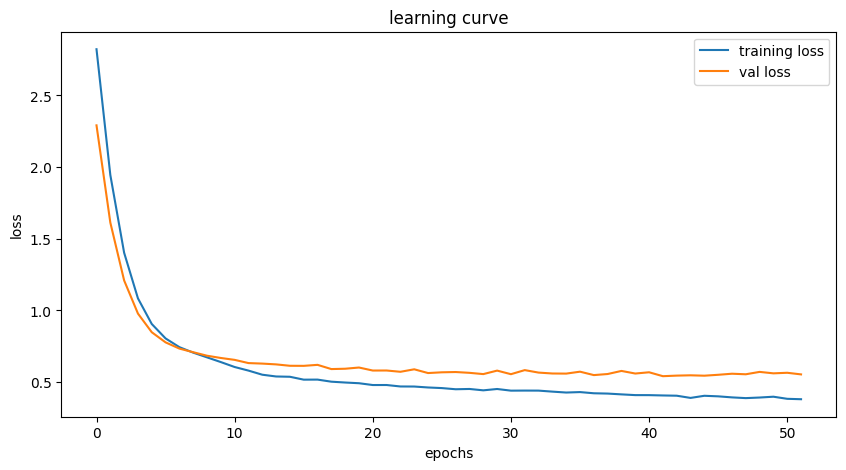

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="val loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("learning curve")
plt.show()

# Evaluate the model

In [29]:
model.evaluate(x_train,y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9555 - loss: 0.3716


[0.38638633489608765, 0.9474999904632568]

In [30]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7986 - loss: 0.6492


[0.626482367515564, 0.800000011920929]

In [31]:
yprob_train = model.predict(x_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [33]:
yprob_train[0:5]

array([[0.04817395],
       [0.9415649 ],
       [0.03354556],
       [0.05370096],
       [0.9813377 ]], dtype=float32)

In [37]:
ypred_Train = (yprob_train >= 0.5).astype(int).flatten()

In [39]:
ypred_Train[0:5]

array([0, 1, 0, 0, 1])

In [40]:
y_train.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [41]:
yprob_test = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [42]:
yprob_test[0:5]

array([[0.32840282],
       [0.9770354 ],
       [0.9805685 ],
       [0.98099524],
       [0.6185143 ]], dtype=float32)

In [43]:
ypred_test = (yprob_test >= 0.5).astype(int).flatten()
ypred_test[0:5]

array([0, 1, 1, 1, 1])

In [44]:
y_train.head()

,Liked
29,0
535,1
695,0
557,0
836,1


# Out of sample prediction

In [48]:
def analyse_sentiment(model,tfidf,svd):
  text = input("please write your review")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  yprob = model.predict(text_pre_red)
  if yprob >= 0.5:
    print("Positive Review")
    ypred=1
  else:
    print("Negative Review")
    ypred = 0
  return ypred,yprob

In [50]:
analyse_sentiment(model,tfidf,svd)


please write your reviewamazing food will visit again. thank you so much muahh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Positive Review


(1, array([[0.9598095]], dtype=float32))

# Save the objects

In [51]:
import joblib as jl
jl.dump(tfidf,"tfidf.joblib")

['tfidf.joblib']

In [52]:
jl.dump(svd,"svd.joblib")

['svd.joblib']

In [53]:
svd

TruncatedSVD(n_components=300)

In [54]:
tfidf

TfidfVectorizer()

In [55]:
model.save("sentiment_model.keras")